In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

cards = pd.read_pickle('./data/cards_processed.pkl')
decks = pd.read_pickle('./data/decks_processed.pkl')

In [2]:
#delete neutral id's
decks = decks[decks['faction'] != 'neutral-runner']
decks = decks[decks['faction'] != 'neutral-corp']
#now remove the draft format decks
draft_cards = ['cards.00005','cards.00006','cards.00007','cards.00008','cards.00009','cards.00010','cards.00011','cards.000013']
decks = decks[~decks['identity_card'].isin(draft_cards)]
#remove decks with no identity card
decks = decks[decks['identity_card'].notnull()]

In [3]:
def display_deck(deck):
    display = [cards[cards['code'] == deck['identity_card']]['title'].iloc[0]]
    deck = deck[0:-5][deck[0:-5] != 0]
    display = display+[str(x[1])+'x '+cards[cards['code'] == x[0]]['title'].iloc[0] for x in list(deck.items())]
    return display

In [4]:
X = decks.loc[:,'cards.01002':'cards.28006']
y = decks['faction'].astype(str)

In [205]:
from sklearn.decomposition import PCA
pca = PCA(2)
projected = pca.fit_transform(X)

MemoryError: 

In [50]:
faction_list = y.unique()
faction_list

array(['weyland-consortium', 'shaper', 'criminal', 'nbn', 'jinteki',
       'haas-bioroid', 'anarch', 'apex', 'sunny-lebeau', 'adam'],
      dtype=object)

In [51]:
colors =[]
for ident in y:
    if ident == 'weyland-consortium':
        color = 'darkgreen'
        
    if ident == 'nbn':
        color = 'yellow'
        
    if ident == 'jinteki':
        color = 'red'
        
    if ident == 'haas-bioroid':
        color = 'purple'
        
    if ident == 'shaper':
        color = 'lightgreen'
        
    if ident == 'criminal':
        color = 'blue'
        
    if ident == 'anarch':
        color = 'orange'
        
    if ident == 'apex':
        color = 'black'
        
    if ident == 'sunny-lebeau':
        color = 'magenta'
        
    if ident == 'adam':
        color = 'gold'
    colors.append(color)

Text(0, 0.5, 'component 2')

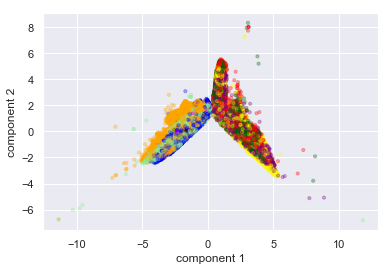

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],s=10,c=colors,alpha=0.3)
plt.xlabel('component 1')
plt.ylabel('component 2')

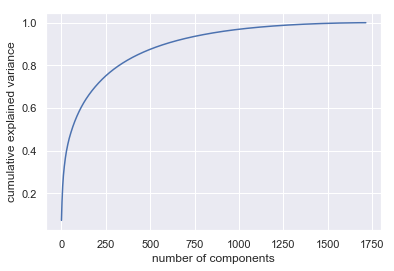

In [14]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [52]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5,test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9779958033233143

In [59]:
faction_list = ['haas-bioroid','jinteki','nbn','weyland-consortium','anarch','criminal','shaper', 'apex', 'sunny-lebeau', 'adam']

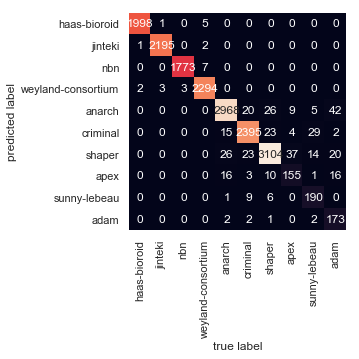

In [60]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y2, y2_model,faction_list)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=faction_list, yticklabels=faction_list)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [7]:
#guassian mixture model

#first reduce dimension
from sklearn.decomposition import PCA
pca = PCA(0.9, whiten=True)
data = pca.fit_transform(X)
data.shape

(35265, 585)

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10).fit(data)

KeyboardInterrupt: 

In [30]:
gmm.bic(data)

-81798004.9566128

In [26]:
deck_new[0]

array([ 0.00025291,  0.00369065,  0.00095326, ..., -0.04864278,
        0.03338733,  0.0092956 ])

In [11]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)